In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read Files
train = pd.read_csv('./Data/house_pricing/train.csv')
test = pd.read_csv('./Data/house_pricing/test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.shape

(1460, 81)

In [6]:
# Check missing values
na_values = pd.DataFrame(train.isnull().sum().rename('missing_value_count')).reset_index().rename(columns={'index': 'var_name'})
na_values[na_values['missing_value_count'] > 0]

,var_name,missing_value_count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


## EDA

### Univariate Analysis

We'll start by identifying a few variables of interest and check their distribution. Since we intend to fit a linear regression model, we should make sure the distribution of the variables is almost linear. So we have to check for any skewness in the distribution. Also we have to check for outliers in the data. The variables I am checking for are 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'Neighborhood' and the target variable 'SalePrice'.

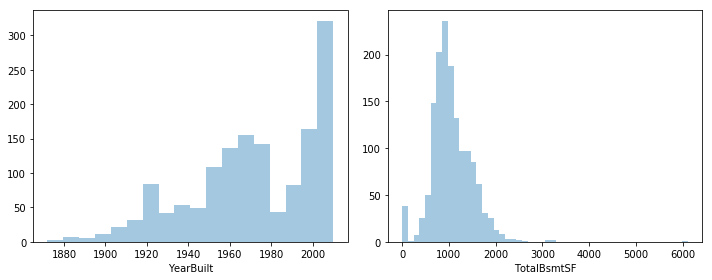

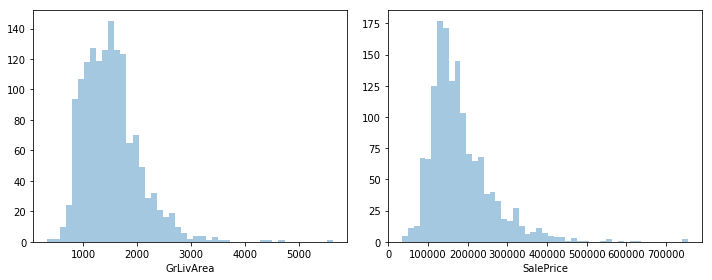

In [7]:
# Histograms
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(train[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(train[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(train[num_cols[i]], kde=False)

All of these are left or right skewed, a transformation is required to make them linear.

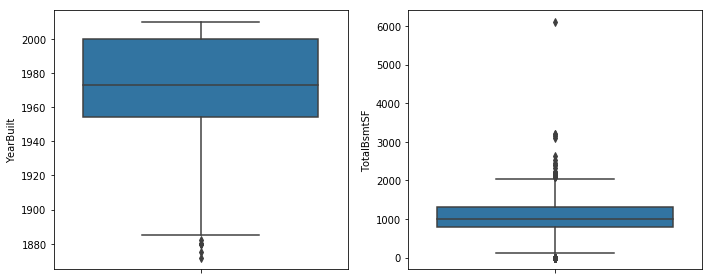

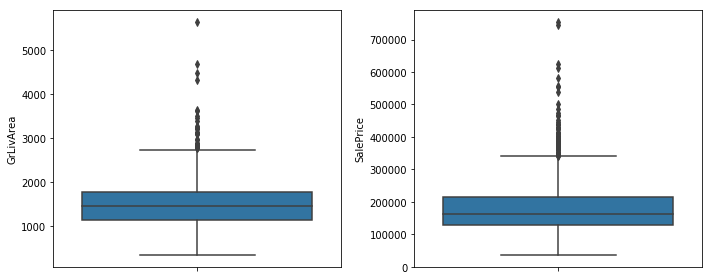

In [8]:
# BoxPlots
num_cols = ['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'SalePrice']
facet = None
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(facet, num_cols[i],data = train)
        plt.subplot(122)            
        sns.boxplot(facet, num_cols[i+1],data = train)
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(facet, num_cols[i],data = train)

Most of our buildings are built post 1960 and most houses have an area in the range 1-2k sq feet. There are quite a few outliers in the sale price and living area and these might be correlated. Lets check the distribution of the categorical columns.

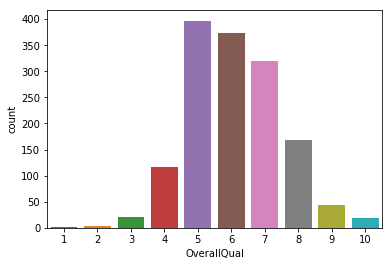

In [9]:
sns.countplot('OverallQual', data=train)

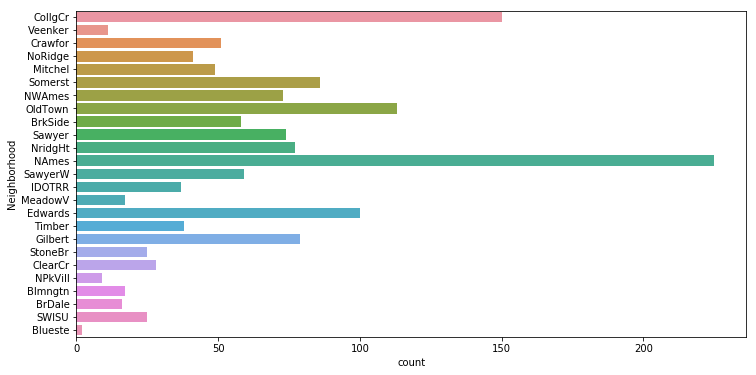

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(y='Neighborhood', data=train)

### Multivariate Analysis

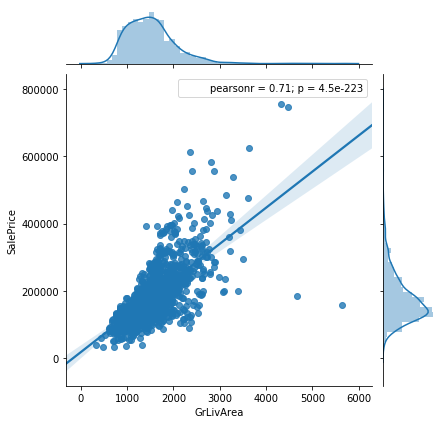

In [11]:
sns.jointplot('GrLivArea', 'SalePrice', data=train, kind='reg')

We can see two points south of the line with high living area are not folowing the trend and can be treated as an outlier. We can remove these from our analysis.

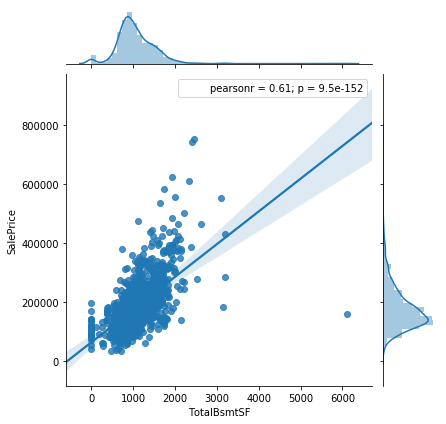

In [12]:
sns.jointplot('TotalBsmtSF', 'SalePrice', data=train, kind='reg')

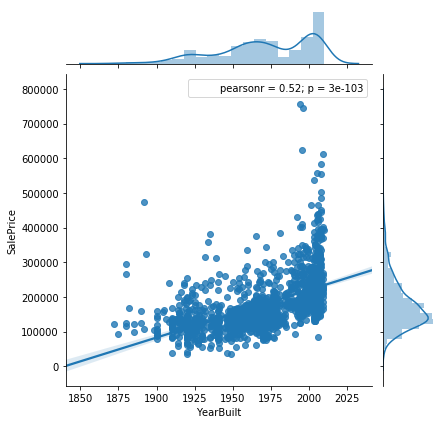

In [13]:
sns.jointplot('YearBuilt', 'SalePrice', data=train, kind='reg')

All the above variables seem to be correlated with the price of the house with varying strengths of correlation. We can also 

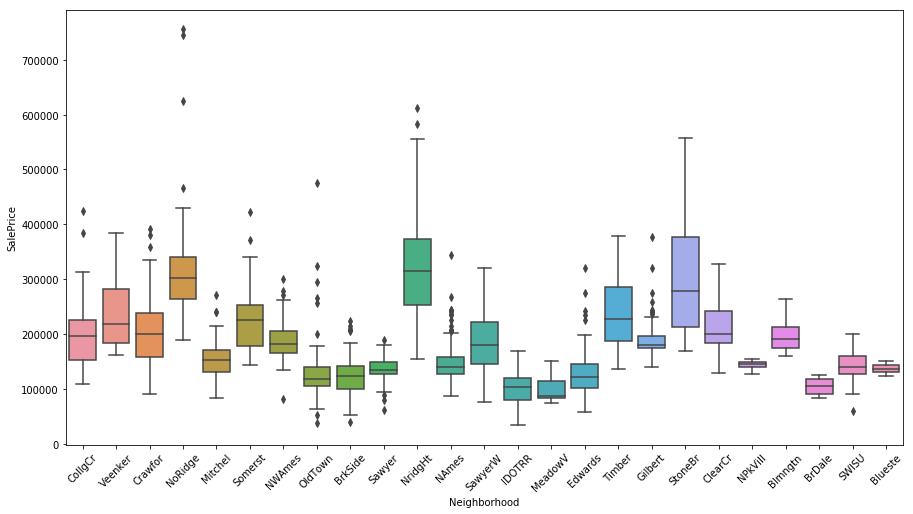

In [14]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood', 'SalePrice', data=train)

The distribution of SalePrice changes with the individual neighborhoods and can be a good predictor for it.

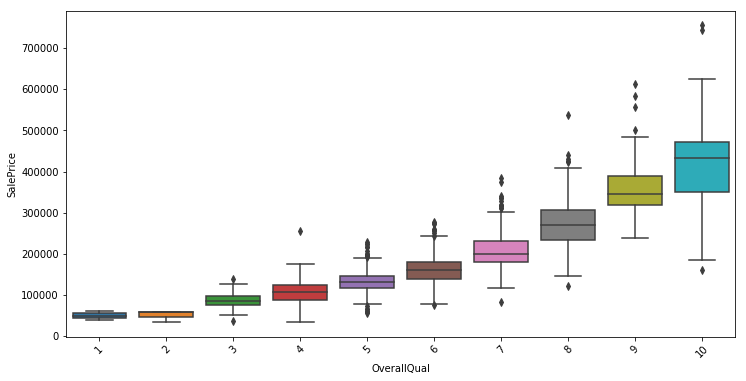

In [15]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.boxplot('OverallQual', 'SalePrice', data=train)

There's a marked increase in saleprice as the overall quality increases.

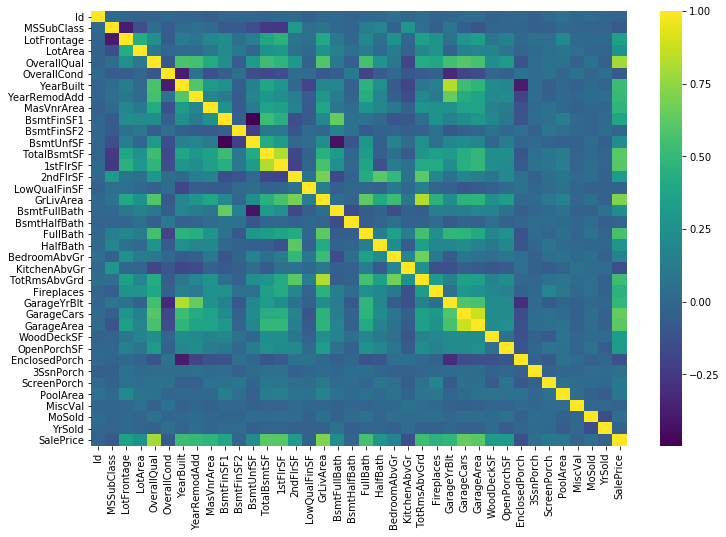

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), cmap = 'viridis')

- We can see a lot of variables correlated to SalePrice which is good. 
- We can also see that GrLivArea is highly correlated with TotRmsAbvGrd.
- Also Year the garage was built(GarageYrBlt) is correlated with the year the building was built(YearBuilt). It's a good idea to remove such correlated variables during feature selection.

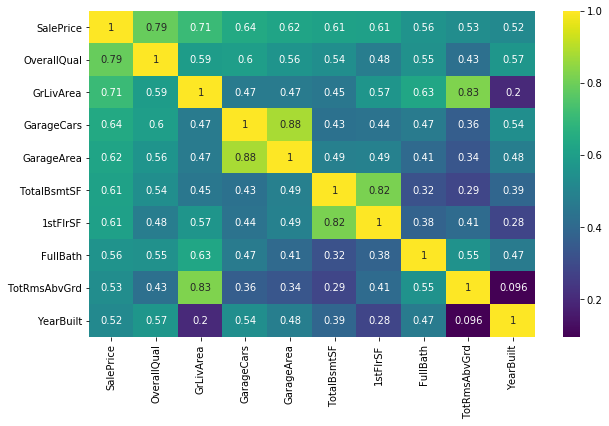

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = train[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also correlated variables. However no of cars that can fit into a garage is dependent on the garage area and we can remove one of these. Check the correlation between them
- TotalBsmtSF and 1stFlrSF are also highy correlated. We can drop one of these.
- As pointed out above Yearbuilt and TotRmsAbvGrd are highly correlated, we'll discard TotRmsAbvGrd.

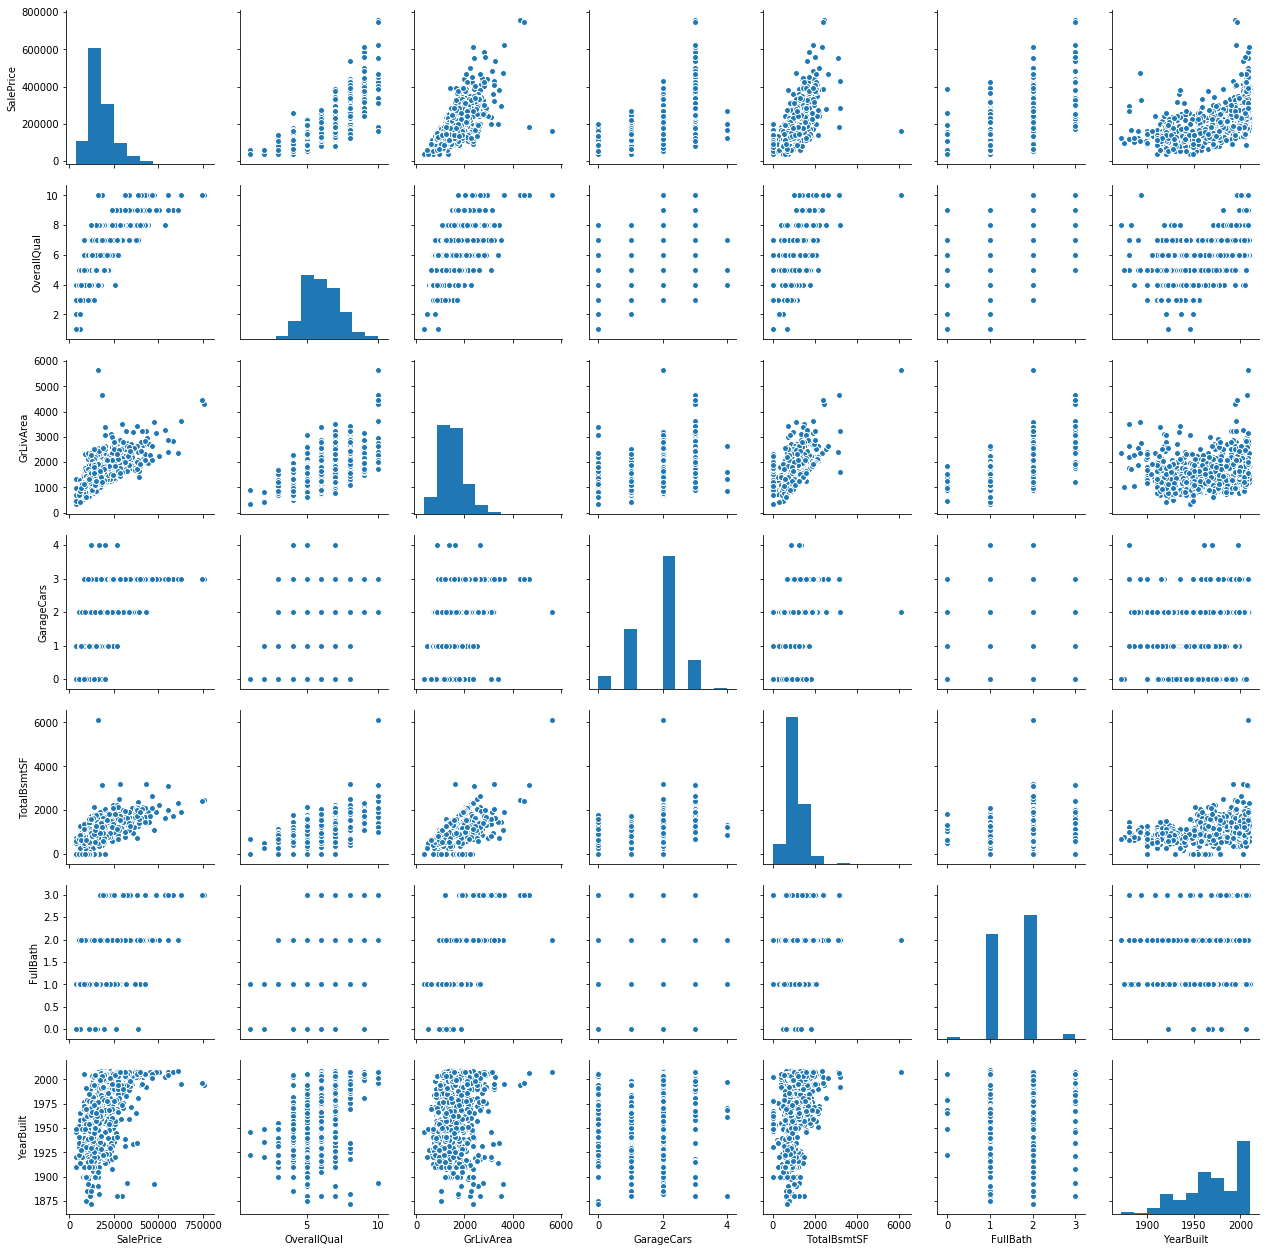

In [18]:
# Visualizing relations between all major variables
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

There are a few interesting things here, in the scatter plot of TotalBsmtSF and GrLivArea, there is a line below which most TotalBsmtSF values fall in which makes sense as the area of Basement usually is lesser than living area. Also there is an exponential increase in SalePrice vs Yearbuilt in the recent past.

## Feature Engineering

Our EDA indicated a lot of skewness in our predictor variables, we'll try and convert them into a normal distribution.

Skewness: 1.36656035602


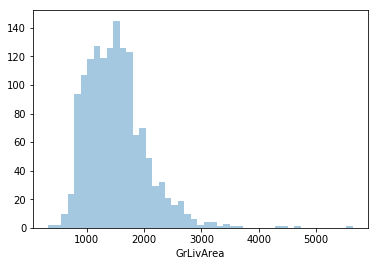

In [23]:
# Living Area
print('Skewness: {}'.format(train['GrLivArea'].skew()))
sns.distplot(train['GrLivArea'], kde=False)

Skewness: -0.00699518218769


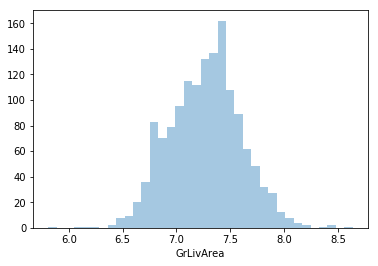

In [24]:
# Log Transformation
train['GrLivArea'] = np.log(train['GrLivArea'])
print('Skewness: {}'.format(train['GrLivArea'].skew()))
sns.distplot(train['GrLivArea'], kde=False)

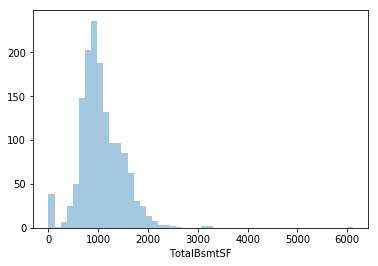

In [19]:
# Basement Area
sns.distplot(train['TotalBsmtSF'], kde=False)

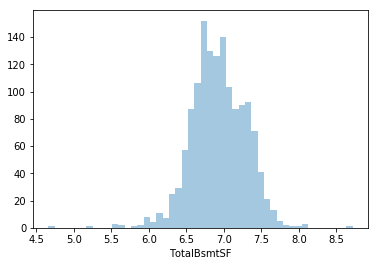

In [22]:
# Log1p Transformation
train['TotalBsmtSF'] = np.log1p(train['TotalBsmtSF'])
sns.distplot(train[train['TotalBsmtSF'] > 0]['TotalBsmtSF'], kde=False)